<a href="https://colab.research.google.com/github/FrancescoCortopassi/copilot-codespaces-vscode/blob/main/T_A_LEZIONE_72_to_80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LEZIONE_72: INTRO

1. UNDERSTAND, CODE AND OPTIMIZE RSI STRATEGY
2. PERFORMANCE MEASUREMENT AND RISK MANAGMENT
3. ADJUST AND USE THE OOP METHOD

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()

In [90]:
#LEZIONE_73: RSI STRATEGY OVERVIEW
ge=pd.read_csv("/content/eurusd.csv",index_col=0,parse_dates=True)
qf=cf.Quantfig(df=ge.loc["2019":])
qf.add_rsi(period=20,rsi_upper=70,rsi_lower=30)
qf.iplot(title= "GE", name= "GE")


NOTA: In questa lezione, come in altre precedenti, per utilizzare QUANTFIG si utilizza il dataframe GE che io in qualche modo non ho preso in considerazione: questo adesso mi porta a non poter eseguire il codice
DA RIVEDERE IN FASE DI RIPASSO

In [97]:
#LEZIONE_74: GETTING DATA
data=pd.read_csv("/content/eurusd.csv",index_col=["Date"],parse_dates=["Date"])
data.head()

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


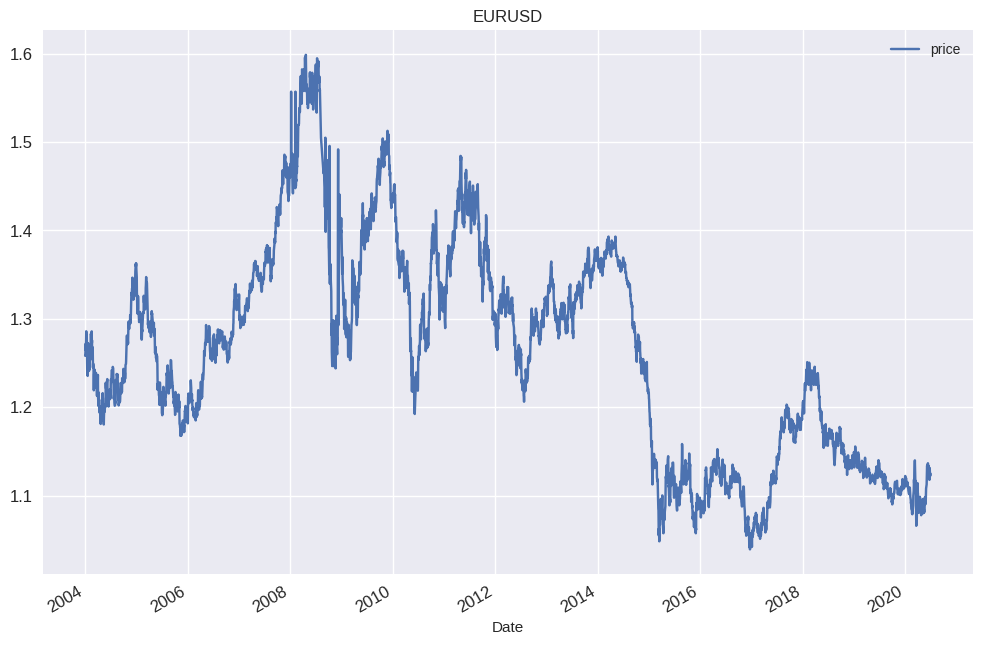

In [99]:
data.plot(figsize=(12,8),title="EURUSD", fontsize=12)
plt.show()

In [100]:
import RSIBacktester as RSI
from RSIBacktester import RSIBacktester  # Import the class

In [101]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [102]:
#tester=RSI("EURUSD=X",periods=20,rsi_upper=70,rsi_lower=30,start="2013-01-01",end="2020-06-30",tc=0)

In [103]:
#tester.strategy()

In [104]:
#tester.plot_results()

In [105]:
#tester.optimize_parameters()

In [106]:
#tester.plot_results()

In [107]:
#LEZIONE_75:Dfining an RSI Strategy (part_1)
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [108]:
data.price.diff()

,price
Date,
2004-01-01,NaN
2004-01-02,0.000000
2004-01-05,0.010504
2004-01-06,0.003405
2004-01-07,-0.008008
...,...
2020-06-24,0.003267
2020-06-25,-0.006147
2020-06-26,-0.002879


Definiamo le due linee UPPER (U) e DOWN(D) per l'RSI.

U:
-Se il prezzo varia in positivo: price_change
-Se il prezzo varia in  negativo: 0

D:
-Se il prezzo varia in positivo: 0
-Se il prezzo varia in  negativo: - price change

In [109]:
data ['U']=np.where(data.price.diff()>0,data.price.diff(),0)

In [110]:
data ['D']=np.where(data.price.diff()<0,-data.price.diff(),0)

In [111]:
data

,price,U,D
Date,,,
2004-01-01,1.258194,0.000000,0.000000
2004-01-02,1.258194,0.000000,0.000000
2004-01-05,1.268698,0.010504,0.000000
2004-01-06,1.272103,0.003405,0.000000
2004-01-07,1.264095,0.000000,0.008008
...,...,...,...
2020-06-24,1.131235,0.003267,0.000000
2020-06-25,1.125087,0.000000,0.006147
2020-06-26,1.122208,0.000000,0.002879


In [112]:
periods=20
data["MA_U"]=data.U.rolling(periods).mean()
data["MA_D"]=data.D.rolling(periods).mean()

In [113]:
data

,price,U,D,MA_U,MA_D
Date,,,,,
2004-01-01,1.258194,0.000000,0.000000,NaN,NaN
2004-01-02,1.258194,0.000000,0.000000,NaN,NaN
2004-01-05,1.268698,0.010504,0.000000,NaN,NaN
2004-01-06,1.272103,0.003405,0.000000,NaN,NaN
2004-01-07,1.264095,0.000000,0.008008,NaN,NaN
...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981


In [114]:
#Calcolare l'indice RSI
data['RSI']=data.MA_U/(data.MA_U+data.MA_D)*100
data.dropna(inplace=True)


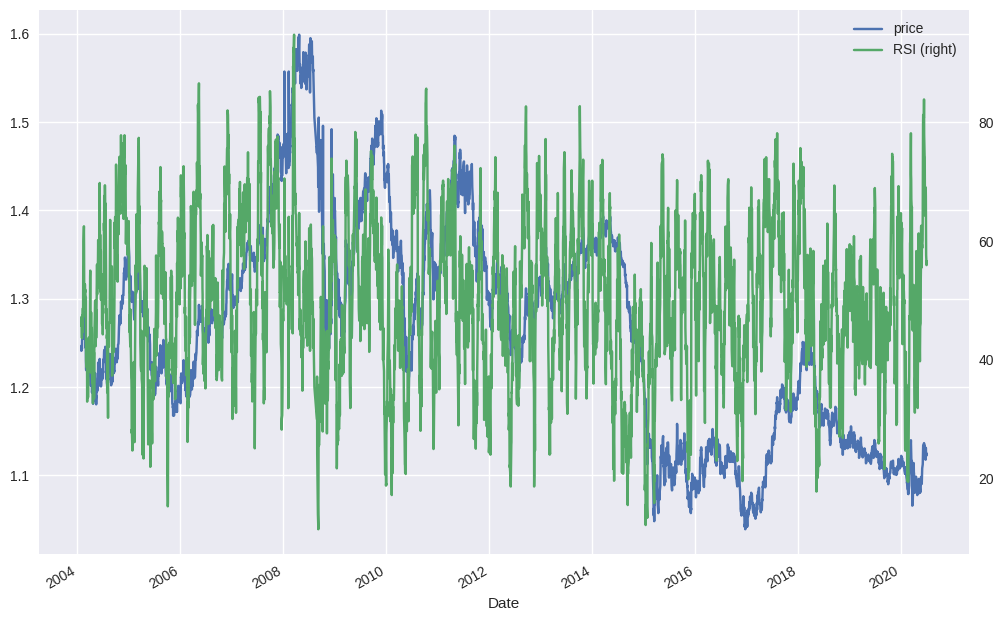

In [115]:
data.loc[:,["price","RSI"]].plot(figsize=(12,8),secondary_y='RSI')
plt.show()

IMPORTANTE:
1.I cambiamenti positivi più forti hanno un RSI più alto
2.I cambiamenti negativi più forti hanno un RSI più basso


In [116]:
#LEZIONE_76:#LEZIONE_75:Defining an RSI Strategy (part_2)
#Quando RSI> di 70 siamo OVERBOUGHT, attesa invesrione= "SELL"
#Quando RSI< di 30 siamo OVERSOLD, attesa invesrione= "SELL"

In [117]:
rsi_upper=70
rsi_lower=30
data["position"]=np.where(data.RSI>rsi_upper,-1,np.nan)
data["position"]=np.where(data.RSI<rsi_lower,1,data.position)

In [118]:
data

,price,U,D,MA_U,MA_D,RSI,position
Date,,,,,,,
2004-01-28,1.244199,0.000000,0.019496,0.004610,0.005310,46.472973,NaN
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150,NaN
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,NaN
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,NaN
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,NaN
...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,NaN
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,NaN
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,NaN


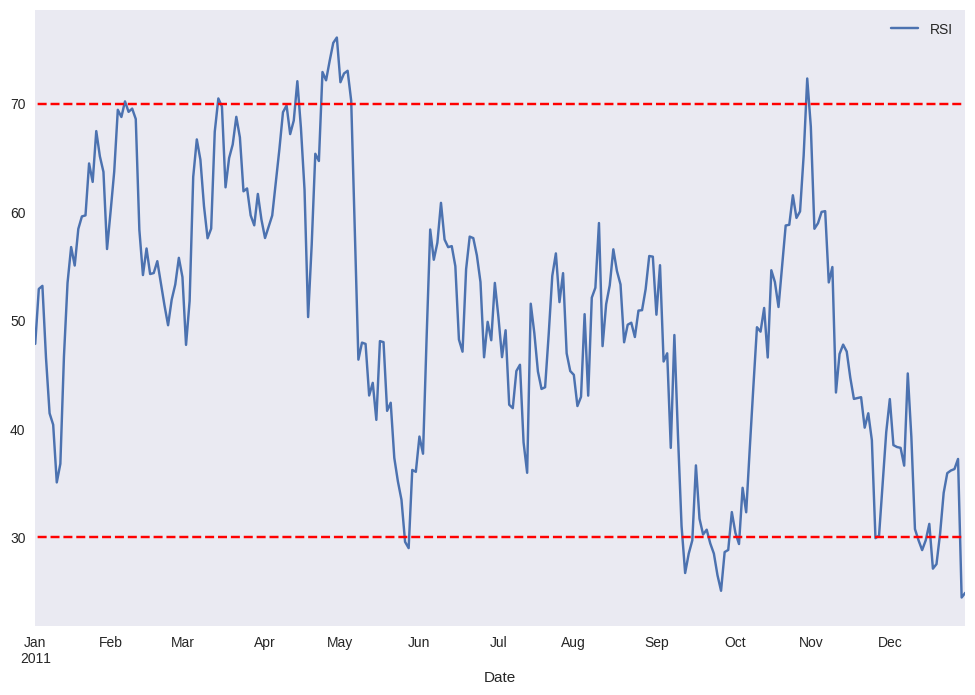

In [149]:
#Plottiamo l'RSI con le lines di UPPER (70) e di DOWN (30)
data.loc["2011","RSI"].plot(figsize=(12,8),secondary_y="position")
plt.hlines(y=rsi_upper,xmin=data.index.min(),xmax=data.index.max(),color="r",linestyle="--")
plt.hlines(y=rsi_lower,xmin=data.index.min(),xmax=data.index.max(),color="r",linestyle="--")
plt.legend()
plt.show()

In [153]:
data['position']=np.where(data.RSI>rsi_upper,-1,np.nan)#Segnale di acquisto
data['position']=np.where(data.RSI<rsi_lower,1,data.position)#Segnale di vendita
data.position=data.position.fillna(0)#Segnale hold
data.head(40)

,price,U,D,MA_U,MA_D,RSI,position
Date,,,,,,,
2004-01-28,1.244199,0.000000,0.019496,0.004610,0.005310,46.472973,0.0
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150,0.0
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0
2004-02-05,1.257197,0.003200,0.000000,0.004229,0.005244,44.642922,0.0
2004-02-06,1.270002,0.012805,0.000000,0.004450,0.005244,45.902219,0.0
2004-02-09,1.269406,0.000000,0.000596,0.004450,0.004684,48.716327,0.0


In [154]:
data.position.value_counts()

,count
position,
0.0,3637
-1.0,316
1.0,303


<Axes: title={'center': 'EUSURS'}, xlabel='Date'>

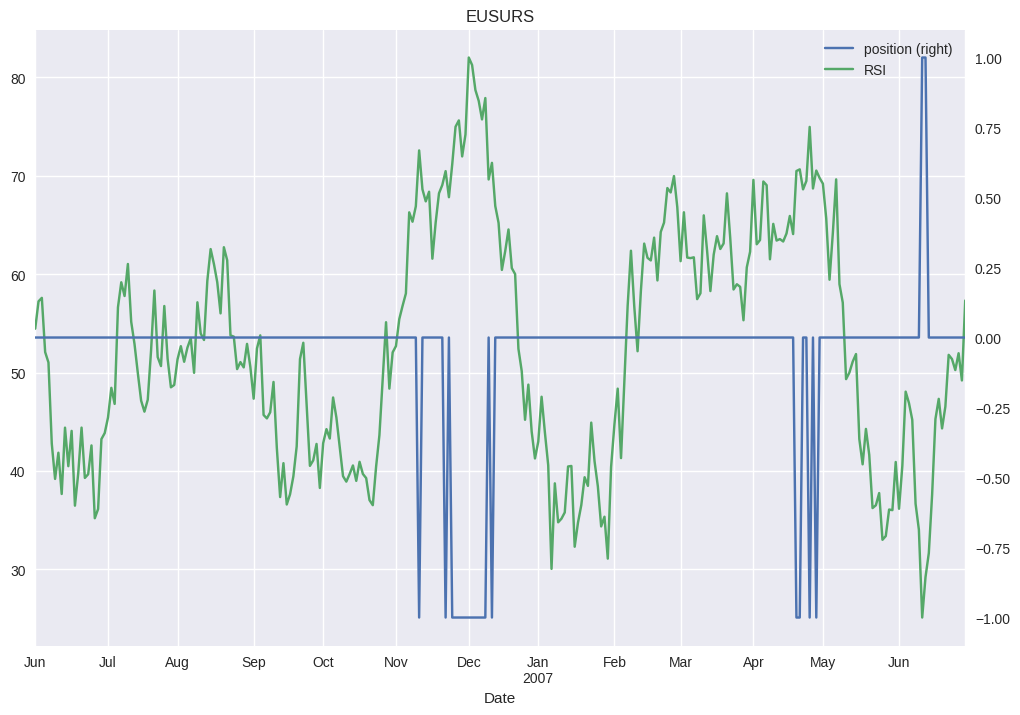

In [158]:
data.loc["6-2006":"6-2007",["position","RSI"]].plot(figsize=(12,8),secondary_y="position",title="EUSURS")

In [169]:
#LEZIONE_78: RSI_BACKTESTER_CLASS
import RSIBacktester as RSI
from RSIBacktester import RSIBacktester  # Import the class

pct=0.00007
tester=RSI("EURUSD=X",periods=20,rsi_upper=70,rsi_lower=30,start="2004-01-01",end="2020-06-30",tc=pct)

TypeError: 'module' object is not callable

In [168]:
tester

RSIBacktester(symbol = EURUSD=X, RSI(20, 70, 30), start = 2004-01-01, end = 2020-06-30)

In [171]:
tester.data()

In [ ]:
tester.test_strategy()

In [ ]:
tester.plot_results()

In [ ]:
tester.optimize_parameters()

In [ ]:
tester.plot_results

LEZIONE_79:OOP CHALLANGE: Create the RSIBacktester Class

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")

class RSIBacktester():
    ''' Class for the vectorized backtesting of MACD-based trading strategies.

    Attributes
    ==========
    symbol: str
        ticker symbol with which to work with
    RSI_upper: int
        time window in days for shorter EMA
    RSI_lower: int
        time window in days for longer EMA
    period: int
        time window is days for MACD Signal
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval
    tc: float
        proportional transaction costs per trade
        import pandas as pd


          Methods
    =======
    get_data:
        retrieves and prepares the data

    set_parameters:
        sets new MACD parameter(s)

    test_strategy:
        runs the backtest for the MACD-based strategy

    plot_results:
        plots the performance of the strategy compared to buy and hold

    update_and_run:
        updates MACD parameters and returns the negative absolute performance (for minimization algorithm)

    optimize_parameters:
        implements a brute force optimization for the three MACD parameters
    '''

In [123]:

    def __init__(self, symbol, RSI_upper, RSI_lower, period, start, end, tc):
        self.symbol = symbol
        self.period = period
        self.RSI_upper = RSI_upper
        self.RSI_lower = RSI_lower
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.get_data()

In [124]:
 def __repr__(self):
        return "RSIBacktester(symbol = {}, RSI({}, {}, {}), start = {}, end = {})".format(self.symbol, self.RSI_upper, self.RSI_lower, self.period, self.start, self.end)

In [125]:
def get_data(self):
        ''' Retrieves and prepares the data.
        '''
        raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["U"] = np.where(raw.price.diff() > 0,raw.price.diff(),0)
        raw["D"] = np.where(raw.price.diff() < 0,raw.price.diff(),0)
        raw["MA-U"] = raw.U.rolling(self.periods).mean()
        raw["MA-D"] = raw.D.rolling(self.periods).mean()
        raw["RSI"] = raw.MA_U /(raw.MA_U + raw.MA_D) * 100
        self.data = raw

In [126]:
 def set_parameters(self, periods= None ,RSI_upper = None, RSI_lower = None):
        ''' Updates MACD parameters and resp. time series.
        '''
        if RSI_upper is not None:
            self.periods= periods
            self.raw["MA-U"] = self.raw.U.rolling(self.periods).mean()
            self.raw["MA-D"] = self.raw.D.rolling(self.periods).mean()
            self.raw["RSI"] = self.raw.MA_U /(self.raw.MA_U + self.raw.MA_D) * 100
            self.data = raw

        if RSI_upper is not None:
            self.RSI_upper = RSI_upper


        if RSI_lower is not None:
            self.RSI_lower = RSI_lower



In [127]:
 def test_strategy(self):
        ''' Backtests the trading strategy.
        '''
        data = self.data.copy().dropna()
        data["position"] = np.where(data["RSI"] > data["RSI_upper"], 1, -1)
        data["position"] = np.where(data["RSI"] < data["RSI_upper"], 1, -1)
        data.position= data.position.fillna(0)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)

        # determine when a trade takes place
        data["trades"] = data.position.diff().fillna(0).abs()

                # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc

        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data

        perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
        return round(perf, 6), round(outperf, 6)
         # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc

        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data

        perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
        return round(perf, 6), round(outperf, 6)

In [128]:
def plot_results(self):
        ''' Plots the cumulative performance of the trading strategy
        compared to buy and hold.
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | RSI ({}, {}, {}) | TC = {}".format(self.symbol, self.EMA_S, self.EMA_L, self.signal_mw, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))

In [129]:
def update_and_run(self, RSI):
        ''' Updates MACD parameters and returns the negative absolute performance (for minimization algorithm).

        Parameters
        ==========
        MACD: tuple
            RSI parameter tuple
        '''
        self.set_parameters(int(RSI[0]), int(RSI[1]), int(RSI[2]))
        return -self.test_strategy()[0]

In [130]:

def optimize_parameters(self,periods, RSI_upper_range, RSI_lower_range):
        ''' Finds global maximum given the RSI parameter ranges.

        Parameters
        ==========
        periods,RSI_upper_range, RSI_lower_range : tuple
            tuples of the form (start, end, step size)
        '''
        opt = brute(self.update_and_run, (periods,RSI_upper_range, RSI_lower_range), finish=None)
        return opt, -self.update_and_run(opt)

In [164]:
#LEZIONE_80: STRATEGIE_ALTERNATIVE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")
from RSIBacktester import RSIBacktester

In [167]:
tester=RSIBacktester("EURUSD=X",periods=20,rsi_upper=70,rsi_lower=30,start="2004-01-01",end="2020-06-30",tc=pct)

In [190]:
alt=tester.data.dropna()
alt

,price,returns,U,D,MA_U,MA_D,RSI
Date,,,,,,,
2004-01-28,1.244199,-0.015548,0.000000,0.019496,0.004610,0.005310,46.472973
2004-01-29,1.241003,-0.002572,0.000000,0.003196,0.004610,0.005470,45.736150
2004-01-30,1.246805,0.004665,0.005802,0.000000,0.004900,0.005470,47.254310
2004-02-02,1.243302,-0.002814,0.000000,0.003503,0.004375,0.005645,43.663573
2004-02-03,1.253494,0.008164,0.010192,0.000000,0.004714,0.005645,45.509086
...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,0.003267,0.000000,0.003182,0.001530,67.538713
2020-06-25,1.125087,-0.005449,0.000000,0.006147,0.003007,0.001837,62.077668
2020-06-26,1.122208,-0.002562,0.000000,0.002879,0.002696,0.001981,57.643190


CONVERGENCE:
+If price higher highs> RSI price reaches higher highs(confirmations)
++If price lower lows> RSI price reaches lower lows (confirmations)

DIVERGENCE:
+If price higher highs> RSI  price fail to reach higher highs(Bearish divergence)
++If price lower lows> RSI price fail to reach lower lows (Bullish Divergence)

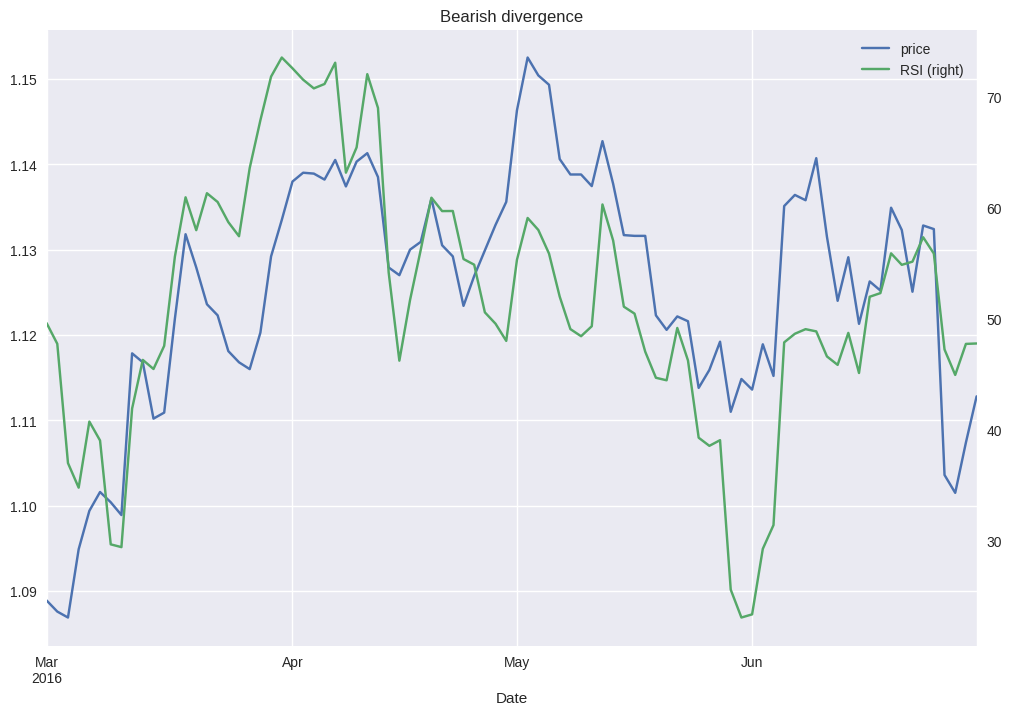

In [191]:
alt.loc["03-2016":"06-2016", ["price","RSI"]].plot(figsize=(12,8),secondary_y="RSI")
plt.title("Bearish divergence", fontsize=12)
plt.show()